<a href="https://colab.research.google.com/github/Pietro55555/PRiR/blob/main/Lab14/Scikit-learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from time import time
from skimage import io

In [12]:
n_colors = 128

Dopasowanie modelu do małej ilości danych
Time: 1.851s.
Przewidywanie wskaźników kolorów na pełnych iteracjach (k-średnie)
Time: 0.332s.
Przewidywanie wskaźników kolorów na pełnym obrazie (losowo)
Time: 0.836s.


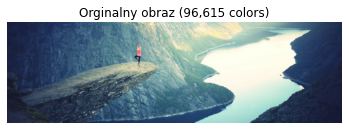

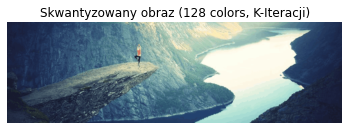

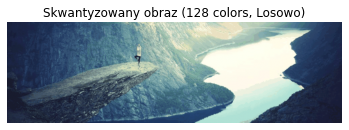

In [16]:
# Załaduj zdjęcie przy pomocy Scikit-image

photo = io.imread("http://www.w3schools.com/css/trolltunga.jpg")

# Konwertuje na liczby zmiennoprzecinkowe zamiast domyślnego 8-bitowego kodowania liczb całkowitych.
#  Dzielenie przez 255 jest ważne, aby plt.imshow zachowywał się dobrze na danych zmiennoprzecinkowych 
# (trzeba być w zakresie [0-1])
photo = np.array(photo, dtype=np.float64) / 255

# Załaduj obraz i przekształć w tablicę dwuwymiarową numpy .
w, h, d = original_shape = tuple(photo.shape)
assert d == 3
image_array = np.reshape(photo, (w * h, d))

print("Dopasowanie modelu do małej ilości danych")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"Time: {time() - t0:0.3f}s.")

print("Przewidywanie wskaźników kolorów na pełnych iteracjach (k-średnie)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"Time: {time() - t0:0.3f}s.")

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Przewidywanie wskaźników kolorów na pełnym obrazie (losowo)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"Time: {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Odtwórz skompresowany obraz z książki kodów i etykiet"""
    return codebook[labels].reshape(w, h, -1)


# Pokaz orginalny obraz oraz rezultaty
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Orginalny obraz (96,615 colors)")
plt.imshow(photo)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Skwantyzowany obraz ({n_colors} colors, K-Iteracji)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Skwantyzowany obraz ({n_colors} colors, Losowo)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()